In [371]:
pip install qutip

In [372]:
import numpy as np
import random
import matplotlib.pyplot as plt
import qutip
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch

In [373]:
k_b = 1
hbar = 1

temperatura = 40
epsilon = 1
gamma_1 = 0.1
gamma_2 = gamma_1 * np.exp(-epsilon/temperatura)
tau = 50
qtd_tempos = 400

# Gerando posicao inicial aleatoria
theta = np.random.uniform(0, np.pi)
phi = np.random.uniform(0, 2 * np.pi)
r0_mod = np.random.uniform(0, 1)
r0x, r0y, r0z = [r0_mod * np.sin(theta) * np.cos(phi), r0_mod *np.sin(theta) * np.sin(phi), r0_mod *np.cos(theta)]

# Caso queira partir de um estado especifico
#r0x =
#r0y =
#roz =

# Definindo o sistema de EDOs
def sistema(t, r):
    rx, ry, rz = r
    d_rx_dt = - epsilon/hbar * ry - (gamma_1 + gamma_2)/2 * rx
    d_ry_dt = epsilon/hbar * rx - (gamma_1 + gamma_2)/2 * ry
    d_rz_dt = - (gamma_1 + gamma_2) * rz - gamma_1 + gamma_2
    return [d_rx_dt, d_ry_dt, d_rz_dt]

# Condições iniciais
r0 = [r0x, r0y, r0z]

# Intervalo de tempo para a solução
t_span = (0, tau)

# Criando um vetor de tempo para a avaliação das soluções
t_eval = np.linspace(0, tau, qtd_tempos)

# Resolvendo o sistema de EDOs
sol = solve_ivp(sistema, t_span, r0, t_eval=t_eval, method='RK45')
rx_solved = sol.y[0]
ry_solved = sol.y[1]
rz_solved = sol.y[2]


# Calculando a matriz de densidade
rho = []

for i in range(qtd_tempos):
    rho.append([[(1 + rz_solved[i])/2 , (rx_solved[i] - 1j * ry_solved[i])/2 ],[ (rx_solved[i] + 1j * ry_solved[i])/2 , (1 - rz_solved[i])/2]])


Algum rx é maior que 1? False
Algum ry é maior que 1? False
Algum rz é maior que 1? False
O estado inicial é r = [0.0228376908610099, 0.6142330351913841, 0.31416237363761773]
O estado final é r = [0.17216569011898292, 0.590323234107581, 0.31416237363761773]


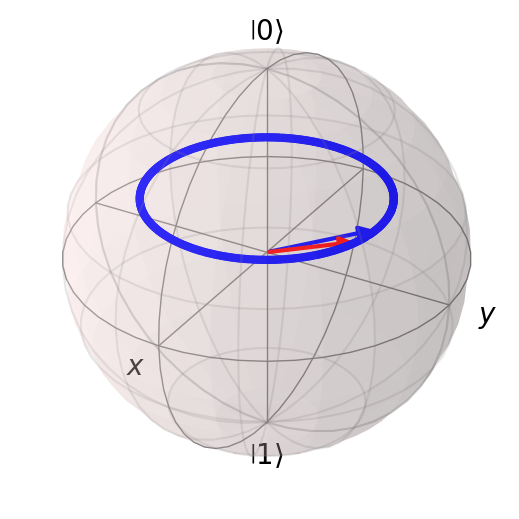

In [374]:
b = qutip.Bloch()

pnt = [rx_solved, ry_solved, rz_solved]
b.add_points(pnt)

b.add_vectors([rx_solved[0], ry_solved[0], rz_solved[0]])
b.add_vectors([rx_solved[-1], ry_solved[-1], rz_solved[-1]])

b.vector_color = ['b', 'r']

any_greater_than_one = np.any(rx_solved > 1)
print("Algum rx é maior que 1?", any_greater_than_one)

any_greater_than_one = np.any(ry_solved > 1)
print("Algum ry é maior que 1?", any_greater_than_one)

any_greater_than_one = np.any(rz_solved > 1)
print("Algum rz é maior que 1?", any_greater_than_one)

print("O estado inicial é r =",[rx_solved[0], ry_solved[0], rz_solved[0]])
print("O estado final é r =",[rx_solved[-1], ry_solved[-1], rz_solved[-1]])

b.render()
b.show()

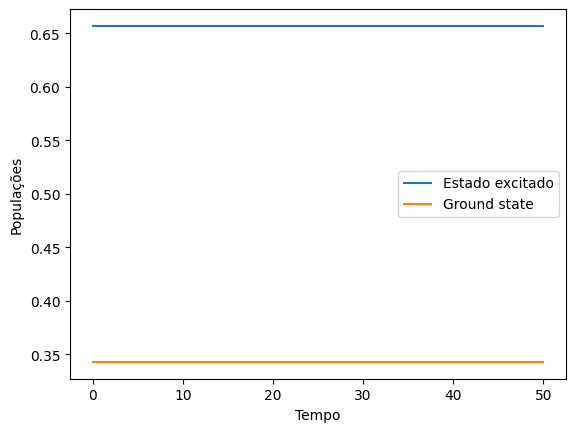

In [375]:
# Plotando as soluções
plt.plot(sol.t, [rho[i][0][0] for i in range(qtd_tempos)], label=r'Estado excitado')
plt.plot(sol.t, [rho[i][1][1] for i in range(qtd_tempos)], label=r'Ground state')
plt.xlabel('Tempo')
plt.ylabel('Populações')
plt.legend()
plt.show()